In [2]:
import pandas as pd
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.isnull().sum()


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [5]:
df.dropna(inplace=True)  


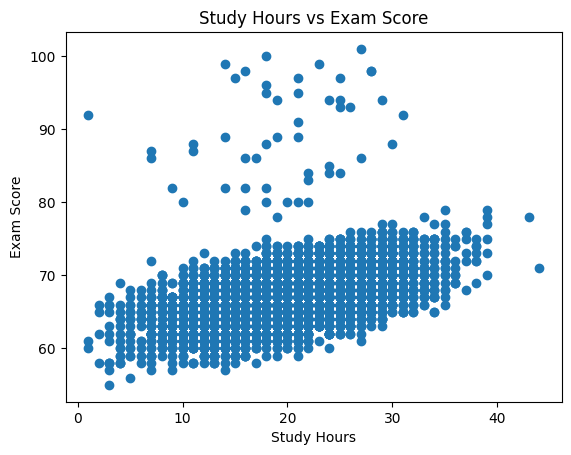

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Study Hours vs Exam Score")
plt.show()


In [9]:
X = df[['Hours_Studied']]  
y = df['Exam_Score']


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
y_pred = model.predict(X_test)


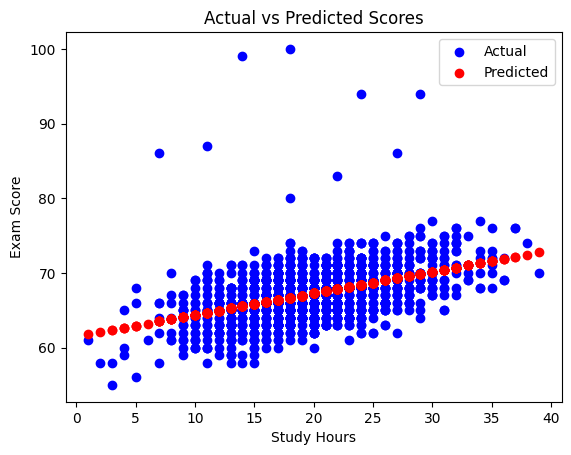

In [13]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Actual vs Predicted Scores")
plt.legend()
plt.show()


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Abslute error:", mean_absolute_error(y_test, y_pred))
print("Mean Square Error:", mean_squared_error(y_test, y_pred))
print("R Squared Score:", r2_score(y_test, y_pred))


Mean Abslute error: 2.5292420695261244
Mean Square Error: 12.351733799445533
R Squared Score: 0.20513060832466712


In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)


In [18]:
print("Polynomial MAE:", mean_absolute_error(y_test, y_pred_poly))
print("Polynomial MSE:", mean_squared_error(y_test, y_pred_poly))
print("Polynomial R²:", r2_score(y_test, y_pred_poly))


Polynomial MAE: 2.5285609417656434
Polynomial MSE: 12.352544212816403
Polynomial R²: 0.20507845590675


C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


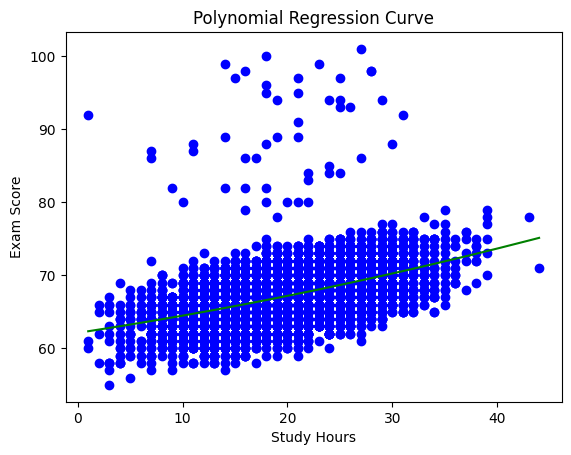

In [19]:
import numpy as np
X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_seq_poly = poly.transform(X_seq)
y_seq_pred = model_poly.predict(X_seq_poly)

plt.scatter(X, y, color='blue')
plt.plot(X_seq, y_seq_pred, color='green')
plt.title("Polynomial Regression Curve")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()
